# <center> NYC TAXI FARE PREDICTION </center>

<center><img src="https://i0.wp.com/www.businesstraveller.nl/wp-content/uploads/2019/08/mmnmnn.jpg?fit=2560%2C1600&ssl=1" width=700></center>

# Objective 
This dataset is a record of taxi trips in New York City.
 These are the features of this dataset: Amount, date_time_of_pickup, longitude_of_pickup, latitude_of_pickup, longitude_of_dropoff        ,latitude_of_dropoff,no_of_passenger,hour,is_weekend,distance,minute,time_slot,is_holiday.

Training observations are labeled with the fare amount paid.

Our objective is to create a model that will accurately estimate the fare amount of trips in the test dataset. Accuracy is measured by ro t mean square 
 rror.

We will also be performing exploratory data analysis in an attempt to better understand the dataset

# Results

### Modeling

* A Rendom Forest Regressor This model has 15 features, making the most use of the Distance,Hour and Time_slot.
* The leaderboard RMSE obtained by this model is 2.44.

# EDA Insights
* Most taxi rides have 1 passenger
* Fares are highest around 5am, primarily due to long trips leaving the city.	
* No. of rides in every yera is constant
* Average Fare by No. of Passengers is 10-11$

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("✅ Libraries Imported Successfully")

✅ Libraries Imported Successfully


# Data Exploration

In [2]:
df = pd.read_csv("TaxiFare.csv", parse_dates=["date_time_of_pickup"])
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.shape

(50000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [5]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [6]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

# Feature Enginnering

In [7]:
df["hour"] = df["date_time_of_pickup"].dt.hour

In [8]:
df["date_time_of_pickup"][1].weekday()

1

In [9]:
def weekend(x):
  day_num = x.weekday()
  if day_num < 5:
    return 0
  else:
    return 1

df["is_weekend"] = df["date_time_of_pickup"].apply(lambda x: weekend(x))

In [10]:
from math import cos,asin,sqrt,pi

def distance(lon1,lat1,lon2,lat2):
    r = 6371
    p = pi / 180

    a = 0.5 - cos((lat2 - lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 2 * r * asin(sqrt(a))

In [11]:
data = []
for x in df.iloc[:,3:7].values:
    data.append(round(distance(x[0],x[1],x[2],x[3]),2))
df["distance"] = data    

In [12]:
df["year"] = df["date_time_of_pickup"].dt.year


In [13]:
df["minute"] = df["date_time_of_pickup"].dt.minute


In [14]:
def time_slot(x):
  hour = x["hour"]
  minute = x["minute"]


  if minute <= 15:
    return hour
  elif (minute > 15) & (minute < 45):
    return hour + 0.5
  else:
    return hour + 1
df["time_slot"] = df.apply(lambda x: time_slot(x), axis = 1)        

In [15]:
# Creating is_weekend column
def weekend(x):
  day_num = x.weekday()
  if day_num < 5:
    return 0
  else:
    return 1

df["is_weekend"] = df["date_time_of_pickup"].apply(lambda x: weekend(x))

In [16]:
# create is_holiday column

import holidays
us_holiday = holidays.US(subdiv = "NY")
def holiday(x):
  if x in us_holiday:
    return 1
  else:
    return 0

df["is_holiday"] = df["date_time_of_pickup"].apply(lambda x: holiday(x))

In [17]:
from math import cos, asin, sqrt, pi

def distance(lon1,lat1,lon2,lat2):
    r = 6371 # km
    p = pi / 180

    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 2 * r * asin(sqrt(a))

In [18]:
data =[]
for x in df.iloc[:,3:7].values:
  data.append(round(distance(x[0],x[1],x[2],x[3]),2))
  
df["distance"] = data

# Data Cleaning

In [19]:
df = df[(df['longitude_of_pickup']>=-75) & 
                    (df['longitude_of_pickup']<=-72) & 
                    (df['longitude_of_dropoff']>=-75) & 
                    (df['longitude_of_dropoff']<=-72) & 
                    (df['latitude_of_pickup']>=40) & 
                    (df['latitude_of_pickup']<=42) & 
                    (df['latitude_of_dropoff']>=40) & 
                    (df['latitude_of_dropoff']<=42) & 
                    (df['amount']>=1) & 
                    (df['amount']<=500) &
                    (df['no_of_passenger']>=1) & 
                    (df['no_of_passenger']<=6)]

In [20]:
df.drop(index=df[(df["amount"] <= 0 )].index,inplace=True)
df.loc[df["amount"]>40.25,["amount"]] = df[df["amount"]>40.25]["amount"]*0.60
df.loc[df["amount"]>22.25,["amount"]] = 22.25
df.drop(index = df[df["distance"] >24].index,inplace = True)
df.drop(index = df[df["distance"] == 0 ].index,inplace = True)

# Exploretory Data Analysis

In [21]:
avg_fare = df.groupby("no_of_passenger")["amount"].mean()
Avg_Fare = round(avg_fare,2)

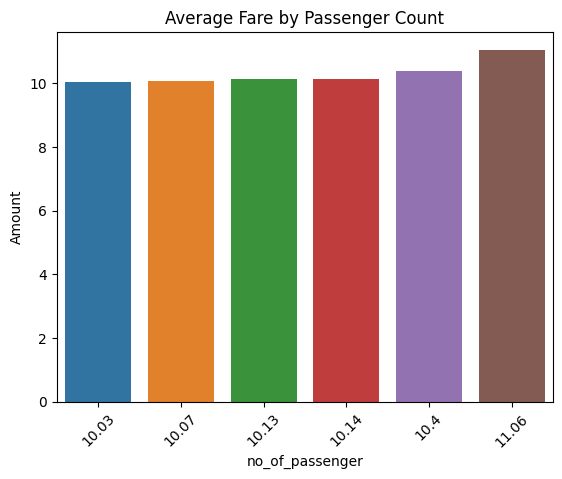

In [22]:
sns.barplot(data = Avg_Fare ,x = Avg_Fare.index , y = Avg_Fare )
plt.title('Average Fare by Passenger Count')
plt.xlabel("no_of_passenger")
plt.ylabel("Amount")
plt.xticks(rotation = 45)
plt.show()

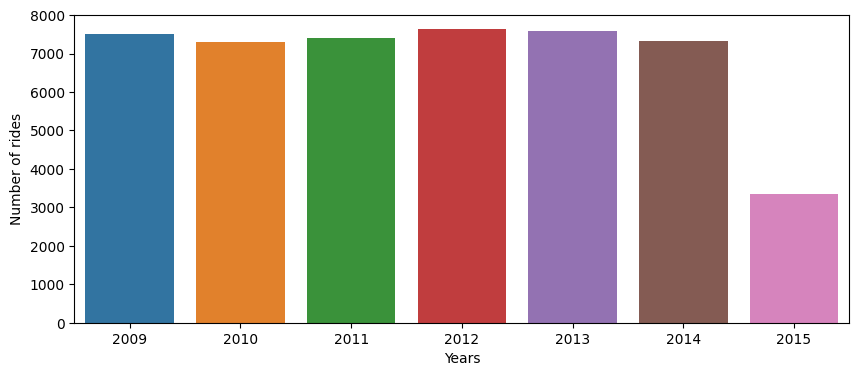

In [23]:
year_insight = df.year.value_counts()

plt.figure(figsize=(10, 4))
palette = sns.color_palette() 
sns.barplot(data=df, x=year_insight.index, y=year_insight.values, palette=palette)
plt.ylabel("Number of rides")
plt.xlabel("Years")
plt.show()

In [24]:
# Avg_Amt_Hour = round(df.groupby("hour")["amount"].mean(),2)
# sns.barplot(data = Avg_Amt_Hour ,x = Avg_Amt_Hour.index , y = Avg_Amt_Hour  )
# plt.title('Average Fare by Each Hour')
# plt.xlabel("Hour")
# plt.ylabel("Amount")
# plt.xticks(rotation = 45)
# plt.show()

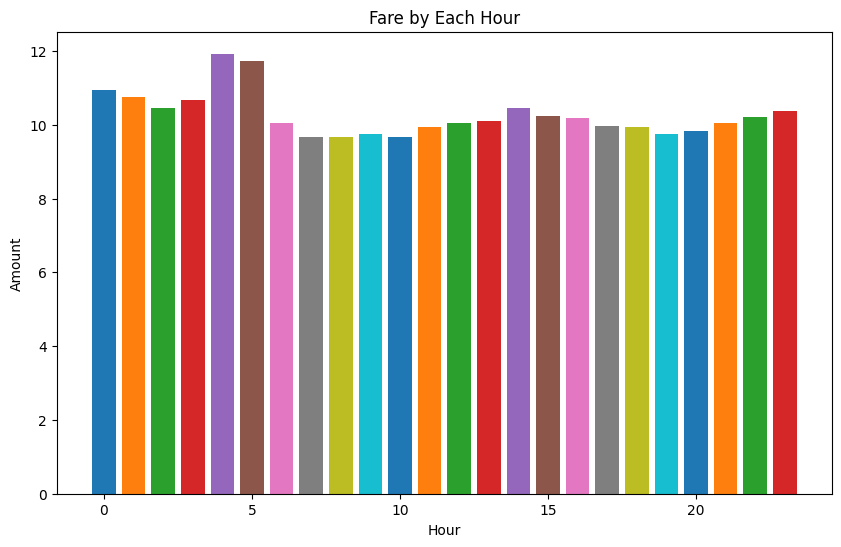

In [25]:
da = df.groupby(["hour"])["amount"].mean()
plt.figure(figsize=(10,6))
palette = sns.color_palette() 
plt.bar(data=da,x=da.index,height=da,color= palette)
plt.title("Fare by Each Hour")
plt.xlabel("Hour")
plt.ylabel("Amount")
plt.show()

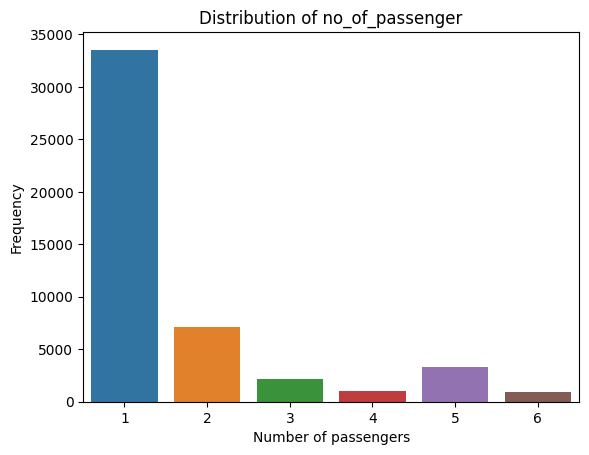

In [26]:
sns.countplot(data=df, x="no_of_passenger")
plt.title("Distribution of no_of_passenger")
plt.xlabel("Number of passengers")
plt.ylabel("Frequency")
plt.show()


Most taxi rides only have 1 passenger, but passenger count doesn't show any relationship to the fare amount.

# Spliting Data

In [27]:
# X = df[["hour","distance","is_weekend","no_of_passenger"]]
X = df[["hour","distance","time_slot"]]
y = df["amount"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 42)
print(f"shape of X_train{X_train.shape}")
print(f"shape of X_test{X_test.shape}")
print(f"shape of y_train{y_train.shape}")
print(f"shape of y_test{y_test.shape}")

shape of X_train(38480, 3)
shape of X_test(9621, 3)
shape of y_train(38480,)
shape of y_test(9621,)


# Model Traning Random Forest Regresso

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=0,min_samples_leaf = 6)
rfc.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=6, random_state=0)

In [29]:
rfc.score(X_train,y_train)

0.8186898582786697

In [30]:
rfc.score(X_test,y_test)

0.7967457523789419

In [31]:
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train,rfc.predict(X_train),squared=False)
rmse_test = mean_squared_error(y_test,rfc.predict(X_test),squared=False)

print(rmse_train)
print(rmse_test)

2.313628247336867
2.445266317068817


# <center> Thank You !!</center>